## Unsupervised Methods

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv('Data/Pipeline_data_toy_bin.csv', index_col=[0])
#df = pd.read_csv('Data/Pipeline_data_bin.csv', index_col=[0])

df.head()

,bmi,cigs_before_preg,birth_time,m_deliveryweight,f_age,m_age,m_height_in,num_prenatal_visits,prior_births_dead,prior_births_living,...,m_morbidity,riskf,payment,mn_prenatalcare_began,delivery_method,res_status,prev_cesarean,infant_sex,weight_change,birthweight_bin
0,46.3,0.0,1341.0,310.0,27.499772,25.0,64.0,18.0,0.0,0.0,...,0.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,40.0,1
1,25.5,0.0,621.0,179.0,19.738769,16.0,65.0,6.0,0.0,0.0,...,0.0,0.0,1.0,6.0,1.0,2.0,0.0,0.0,26.0,0
2,21.8,0.0,741.0,154.0,27.000000,24.0,63.0,15.0,0.0,0.0,...,0.0,0.0,2.0,2.0,1.0,1.0,0.0,1.0,31.0,1
3,22.7,0.0,750.0,150.0,31.000000,28.0,62.0,16.0,0.0,1.0,...,0.0,1.0,1.0,3.0,2.0,1.0,1.0,0.0,26.0,0
4,34.0,3.0,1423.0,192.0,28.000000,31.0,63.0,8.0,0.0,1.0,...,0.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0


In [7]:
X = df.drop(['birthweight_bin'], axis=1)
y = df['birthweight_bin']

#### Try with only numeric features / only subsets of interesting features

In [8]:
X_num = X[['bmi','cigs_before_preg','birth_time','m_deliveryweight','f_age','m_age','m_height_in',
           'num_prenatal_visits','prior_births_dead','prior_births_living','prior_terminations','prepreg_weight',
           'num_prev_cesareans','time_since_menses','weight_change','mn_prenatalcare_began']]

In [9]:
X_num.head()

,bmi,cigs_before_preg,birth_time,m_deliveryweight,f_age,m_age,m_height_in,num_prenatal_visits,prior_births_dead,prior_births_living,prior_terminations,prepreg_weight,num_prev_cesareans,time_since_menses,weight_change,mn_prenatalcare_began
0,46.3,0.0,1341.0,310.0,27.499772,25.0,64.0,18.0,0.0,0.0,1.0,270.0,0.0,236.0,40.0,2.0
1,25.5,0.0,621.0,179.0,19.738769,16.0,65.0,6.0,0.0,0.0,0.0,153.0,0.0,263.0,26.0,6.0
2,21.8,0.0,741.0,154.0,27.000000,24.0,63.0,15.0,0.0,0.0,0.0,123.0,0.0,263.0,31.0,2.0
3,22.7,0.0,750.0,150.0,31.000000,28.0,62.0,16.0,0.0,1.0,1.0,124.0,1.0,264.0,26.0,3.0
4,34.0,3.0,1423.0,192.0,28.000000,31.0,63.0,8.0,0.0,1.0,1.0,192.0,0.0,265.0,0.0,2.0


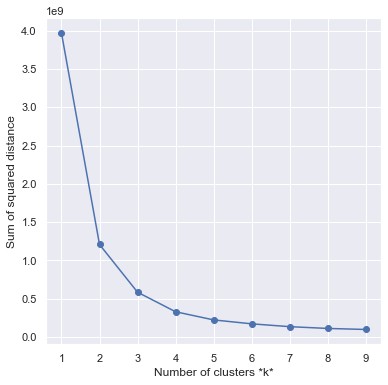

In [160]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_num)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

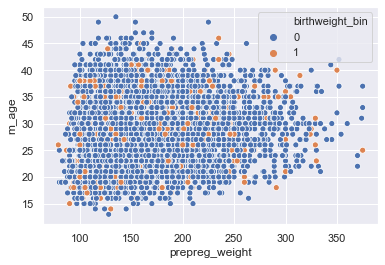

In [162]:
sns.scatterplot(X_num['prepreg_weight'], X_num['m_age'], hue = y);

#### Try clustering with only features from before/early in pregnancy (i.e. see if clustering identifies subgroups related to future birthweight) 
##### (could also just look at strongest PCA components from biplot)

In [9]:
X_pre = X.drop(['birth_time','m_deliveryweight','num_prenatal_visits','time_since_menses','weight_change',
            'mn_prenatalcare_began','gonorrhea','labour_induced','admit_icu','m_transferred','infections',
            'infant_sex','birth_attendant','birth_place','birth_mn','birth_dy','payment','delivery_method'], 
            axis=1)

In [41]:
#num_cols = ('bmi','cigs_before_preg','f_age','m_age','m_height_in','prior_births_dead','prior_births_living',
#            'prior_terminations','prepreg_weight','num_prev_cesareans')

#bin_cols = ('m_morbidity','riskf','prev_cesarean')

#cat_cols = ('f_education','f_hispanic','f_race6','m_nativity','m_education','m_hispanic','m_race6','res_status')

In [42]:
num_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(drop='first'))])


preprocessor = ColumnTransformer(
        remainder='passthrough', #passthough features not listed
        transformers=[
            ('num', num_transformer , num_cols),
            ('cat', cat_transformer , cat_cols)
        ])

In [43]:
#X_processed_pre = preprocessor.fit_transform(X_pre)

In [44]:
#X_processed_pre = pd.DataFrame(X_processed_pre)

In [ ]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_num)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [139]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_num)
pred = kmeans.predict(X_num)

In [140]:
X_km = X_num.copy()
X_km['cluster'] = pred
X_km['cluster'].value_counts()

2    4208
1    3647
0    2145
Name: cluster, dtype: int64

In [141]:
X_km.groupby("cluster").describe()

bmi                                                               \
          count       mean       std        min   25%        50%   75%   max   
cluster                                                                        
0        2145.0  26.780703  6.504326  15.000000  22.1  25.400000  30.0  61.1   
1        3647.0  27.265104  6.804859  15.200000  22.3  25.700000  30.8  65.5   
2        4208.0  27.369228  6.922152   9.641903  22.3  25.789035  31.1  66.4   

        cigs_before_preg            ... infant_sex      weight_change  \
                   count      mean  ...        75%  max         count   
cluster                             ...                                 
0                 2145.0  1.095884  ...        1.0  1.0        2145.0   
1                 3647.0  1.201157  ...        1.0  1.0        3647.0   
2                 4208.0  1.155365  ...        1.0  1.0        4208.0   

                                                                       
              mean        std   min   25%        50%   75%        max  
cluster                                                                
0        29.037834  15.161515 -46.0  20.0  29.000000  38.0  102.00000  
1        29.474865  16.130966 -36.0  20.0  29.000000  39.0  132.00000  
2        29.539617  15.853976 -43.0  20.0  29.492206  39.0  164.07474  

[3 rows x 312 columns]

In [142]:
X_km.head()

,bmi,cigs_before_preg,birth_time,m_deliveryweight,f_age,m_age,m_height_in,num_prenatal_visits,prior_births_dead,prior_births_living,...,m_morbidity,riskf,payment,mn_prenatalcare_began,delivery_method,res_status,prev_cesarean,infant_sex,weight_change,cluster
0,46.3,0.0,1341.0,310.0,27.499772,25.0,64.0,18.0,0.0,0.0,...,0.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,40.0,2
1,25.5,0.0,621.0,179.0,19.738769,16.0,65.0,6.0,0.0,0.0,...,0.0,0.0,1.0,6.0,1.0,2.0,0.0,0.0,26.0,0
2,21.8,0.0,741.0,154.0,27.000000,24.0,63.0,15.0,0.0,0.0,...,0.0,0.0,2.0,2.0,1.0,1.0,0.0,1.0,31.0,2
3,22.7,0.0,750.0,150.0,31.000000,28.0,62.0,16.0,0.0,1.0,...,0.0,1.0,1.0,3.0,2.0,1.0,1.0,0.0,26.0,2
4,34.0,3.0,1423.0,192.0,28.000000,31.0,63.0,8.0,0.0,1.0,...,0.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,2


In [143]:
X_km['birthweight_bin'] = y

In [144]:
cluster1 = X_km[X_km['cluster'] == 0]
cluster2 = X_km[X_km['cluster'] == 1]
cluster3 = X_km[X_km['cluster'] == 2]
cluster4 = X_km[X_km['cluster'] == 3]

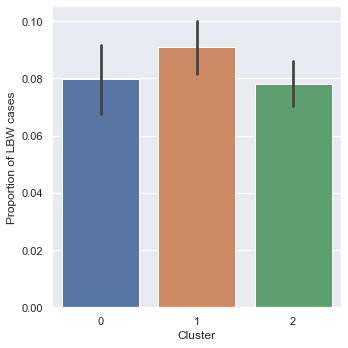

In [145]:
sns.catplot(x="cluster", y="birthweight_bin", kind="bar", data=X_km)
plt.ylabel('Proportion of LBW cases')
plt.xlabel('Cluster');

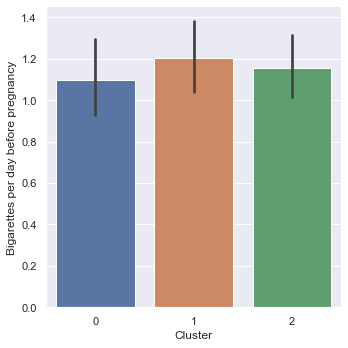

In [146]:
sns.catplot(x="cluster", y="cigs_before_preg", kind="bar", data=X_km)
plt.ylabel("Bigarettes per day before pregnancy")
plt.xlabel('Cluster');

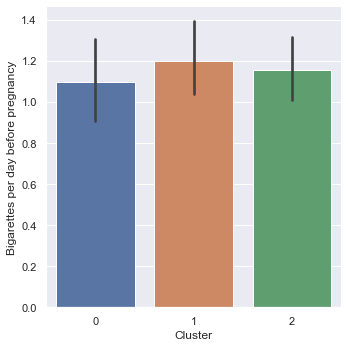

In [147]:
sns.catplot(x="cluster", y="cigs_before_preg", kind="bar", data=X_km)
plt.ylabel("Bigarettes per day before pregnancy")
plt.xlabel('Cluster');

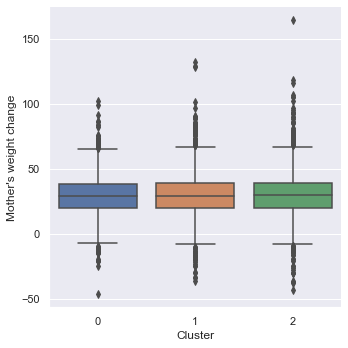

In [148]:
sns.catplot(x="cluster", y="weight_change", kind="box", data=X_km)
plt.ylabel("Mother's weight change")
plt.xlabel('Cluster');

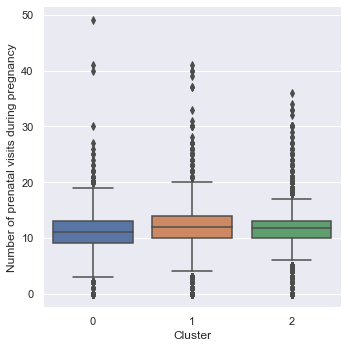

In [149]:
sns.catplot(x="cluster", y="num_prenatal_visits", kind="box", data=X_km)
plt.ylabel("Number of prenatal visits during pregnancy")
plt.xlabel('Cluster');

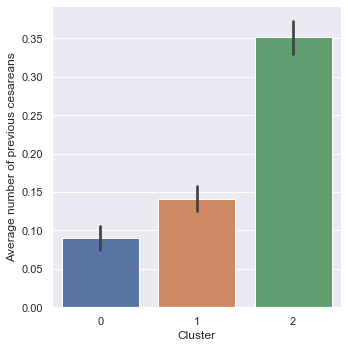

In [150]:
sns.catplot(x="cluster", y="num_prev_cesareans", kind="bar", data=X_km)
plt.ylabel("Average number of previous cesareans")
plt.xlabel('Cluster');

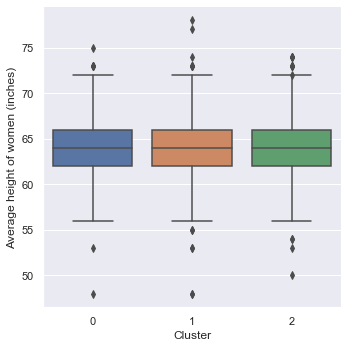

In [151]:
sns.catplot(x="cluster", y="m_height_in", kind="box", data=X_km)
plt.ylabel("Average height of women (inches)")
plt.xlabel('Cluster');

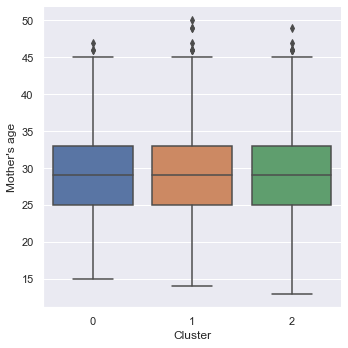

In [152]:
sns.catplot(x="cluster", y="m_age", kind="box", data=X_km)
plt.ylabel("Mother's age")
plt.xlabel('Cluster');

#### Try clustering after removing anomalies

In [1]:
from sklearn.ensemble import IsolationForest

In [31]:
iso_f = IsolationForest(n_estimators = 100, 
                        max_samples = 256,
                        contamination = 'auto', 
                        random_state = 0)
iso_f.fit(X_num)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=256, n_estimators=100,
                n_jobs=None, random_state=0, verbose=0, warm_start=False)

In [32]:
y_pred = iso_f.predict(X_num)
y_pred = [1 if x == -1 else 0 for x in y_pred]

In [33]:
np.mean(y_pred)

0.0652

In [34]:
outlier_idx = []

for i in range(1, len(y_pred)):
    if y_pred[i] == 1:
        idx = i
        outlier_idx.append(idx)

In [35]:
len(outlier_idx)

652

In [39]:
X_num = pd.DataFrame(X_num)
y = pd.DataFrame(y)

In [40]:
X_if = X_num.drop(axis=0, index=outlier_idx)
y_if = y.drop(axis=0, index=outlier_idx)

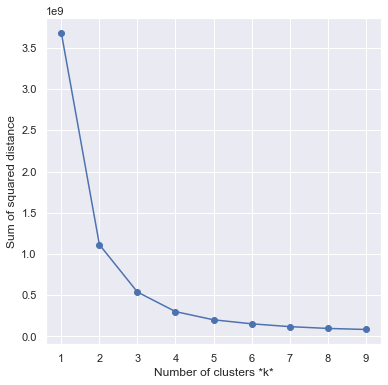

In [41]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_if)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [43]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_if)
pred = kmeans.predict(X_if)

In [44]:
X_km = X_if.copy()
X_km['cluster'] = pred
X_km['cluster'].value_counts()

2    3917
0    3405
1    2026
Name: cluster, dtype: int64

In [45]:
X_km.groupby("cluster").describe()

bmi                                                          \
          count       mean       std        min   25%   50%   75%   max   
cluster                                                                   
0        3405.0  26.656466  5.941833  15.200000  22.1  25.5  30.0  51.2   
1        2026.0  26.214663  5.619866  15.000000  22.0  25.1  29.3  51.2   
2        3917.0  26.762139  6.143896   9.641903  22.1  25.5  30.2  54.9   

        cigs_before_preg            ... weight_change         \
                   count      mean  ...           75%    max   
cluster                             ...                        
0                 3405.0  0.869484  ...     39.000000  132.0   
1                 2026.0  0.831526  ...     37.000000   87.0   
2                 3917.0  0.776593  ...     38.559893  118.0   

        mn_prenatalcare_began                                                
                        count      mean       std  min  25%  50%  75%   max  
cluster                                                                      
0                      3405.0  2.845521  1.410755  0.0  2.0  3.0  3.0   9.0  
1                      2026.0  2.878578  1.493051  0.0  2.0  3.0  3.0  10.0  
2                      3917.0  2.855502  1.421437  0.0  2.0  3.0  3.0   9.0  

[3 rows x 128 columns]

In [24]:
X_km.head()

,bmi,cigs_before_preg,birth_time,m_deliveryweight,f_age,m_age,m_height_in,num_prenatal_visits,prior_births_dead,prior_births_living,prior_terminations,prepreg_weight,num_prev_cesareans,time_since_menses,weight_change,mn_prenatalcare_began,cluster,birthweight_bin
0,46.3,0.0,1341.0,310.0,27.499772,25.0,64.0,18.0,0.0,0.0,1.0,270.0,0.0,236.0,40.0,2.0,0,1
1,25.5,0.0,621.0,179.0,19.738769,16.0,65.0,6.0,0.0,0.0,0.0,153.0,0.0,263.0,26.0,6.0,2,0
2,21.8,0.0,741.0,154.0,27.000000,24.0,63.0,15.0,0.0,0.0,0.0,123.0,0.0,263.0,31.0,2.0,0,1
3,22.7,0.0,750.0,150.0,31.000000,28.0,62.0,16.0,0.0,1.0,1.0,124.0,1.0,264.0,26.0,3.0,0,0
4,34.0,3.0,1423.0,192.0,28.000000,31.0,63.0,8.0,0.0,1.0,1.0,192.0,0.0,265.0,0.0,2.0,0,0


In [46]:
X_km['birthweight_bin'] = y

In [47]:
cluster1 = X_km[X_km['cluster'] == 0]
cluster2 = X_km[X_km['cluster'] == 1]
cluster3 = X_km[X_km['cluster'] == 2]
cluster4 = X_km[X_km['cluster'] == 3]

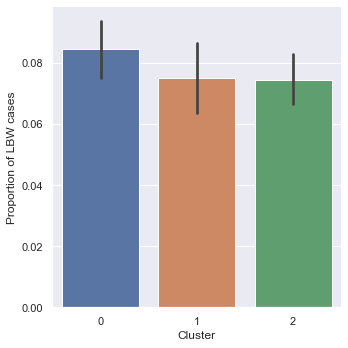

In [48]:
sns.catplot(x="cluster", y="birthweight_bin", kind="bar", data=X_km)
plt.ylabel('Proportion of LBW cases')
plt.xlabel('Cluster');

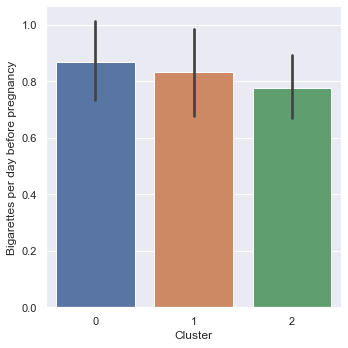

In [49]:
sns.catplot(x="cluster", y="cigs_before_preg", kind="bar", data=X_km)
plt.ylabel("Bigarettes per day before pregnancy")
plt.xlabel('Cluster');

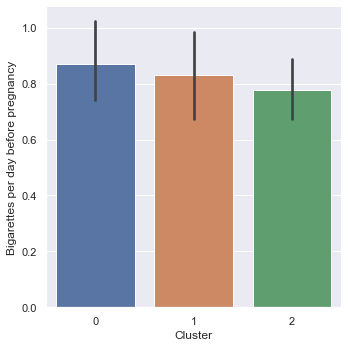

In [50]:
sns.catplot(x="cluster", y="cigs_before_preg", kind="bar", data=X_km)
plt.ylabel("Bigarettes per day before pregnancy")
plt.xlabel('Cluster');

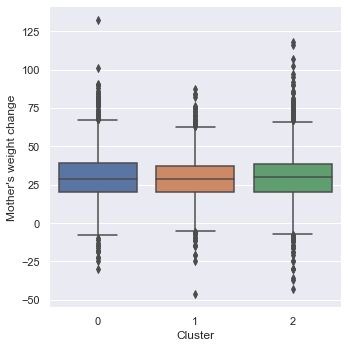

In [51]:
sns.catplot(x="cluster", y="weight_change", kind="box", data=X_km)
plt.ylabel("Mother's weight change")
plt.xlabel('Cluster');

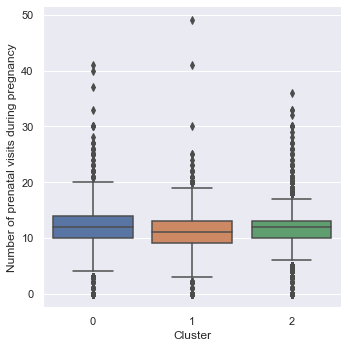

In [52]:
sns.catplot(x="cluster", y="num_prenatal_visits", kind="box", data=X_km)
plt.ylabel("Number of prenatal visits during pregnancy")
plt.xlabel('Cluster');

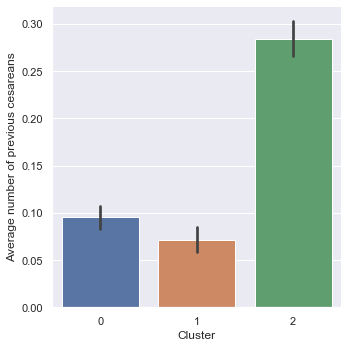

In [53]:
sns.catplot(x="cluster", y="num_prev_cesareans", kind="bar", data=X_km)
plt.ylabel("Average number of previous cesareans")
plt.xlabel('Cluster');

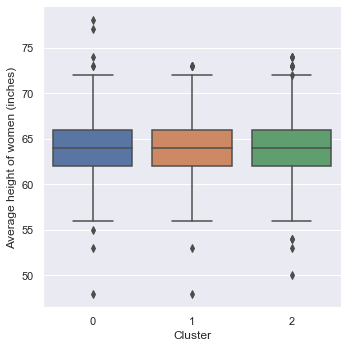

In [54]:
sns.catplot(x="cluster", y="m_height_in", kind="box", data=X_km)
plt.ylabel("Average height of women (inches)")
plt.xlabel('Cluster');

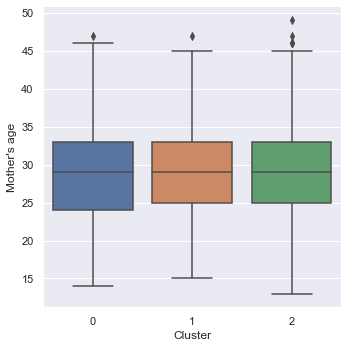

In [55]:
sns.catplot(x="cluster", y="m_age", kind="box", data=X_km)
plt.ylabel("Mother's age")
plt.xlabel('Cluster');

#### Try with PCA and all features

In [163]:
num_cols = ('bmi','cigs_before_preg','birth_time','m_deliveryweight','f_age','m_age','m_height_in',
            'num_prenatal_visits','prior_births_dead','prior_births_living','prior_terminations','prepreg_weight',
            'num_prev_cesareans','time_since_menses','weight_change','mn_prenatalcare_began')

bin_cols = ('gonorrhea','labour_induced','admit_icu','m_transferred','infections','m_morbidity','riskf',
            'prev_cesarean','infant_sex')

cat_cols = ('birth_attendant','birth_place','birth_mn','birth_dy','f_education','f_hispanic','f_race6',
            'm_nativity','m_education','m_hispanic','m_race6','payment','delivery_method','res_status')

In [164]:
num_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(drop='first'))])


preprocessor = ColumnTransformer(
        remainder='passthrough', #passthough features not listed
        transformers=[
            ('num', num_transformer , num_cols),
            ('cat', cat_transformer , cat_cols)
        ])

In [165]:
X_processed = preprocessor.fit_transform(X)

In [166]:
X_processed = pd.DataFrame(X_processed)
X_processed.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.810418,-0.230973,0.196021,2.893451,-0.594191,-0.695671,-0.049740,1.641846,-0.083903,-0.885747,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.250946,-0.230973,-0.953470,-0.233957,-1.754119,-2.253880,0.310014,-1.326265,-0.083903,-0.885747,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.795515,-0.230973,-0.761888,-0.830791,-0.668885,-0.868806,-0.409494,0.899818,-0.083903,-0.885747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.663052,-0.230973,-0.747520,-0.926284,-0.071061,-0.176268,-0.769248,1.147161,-0.083903,-0.104459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.000092,0.366727,0.326935,0.076396,-0.519429,0.343135,-0.409494,-0.831580,-0.083903,-0.104459,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


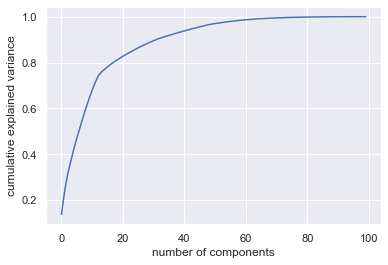

In [167]:
pca = PCA().fit(X_processed)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [175]:
pca = PCA(n_components=50)
X_all_pca = pca.fit_transform(X_processed)

X_all_pca = pd.DataFrame(X_all_pca)

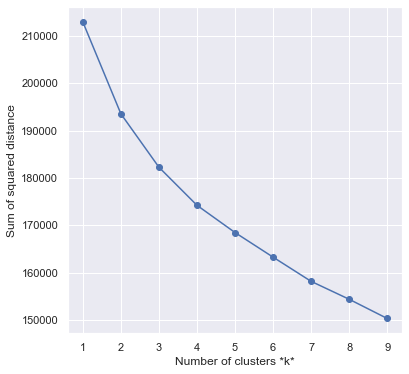

In [176]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_all_pca)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

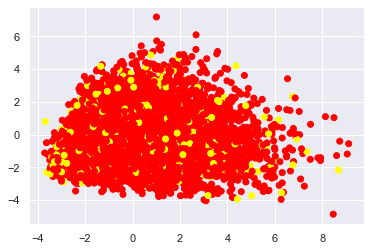

ValueError: 'c' argument has 10000 elements, which is not acceptable for use with 'x' with size 500000, 'y' with size 500000.

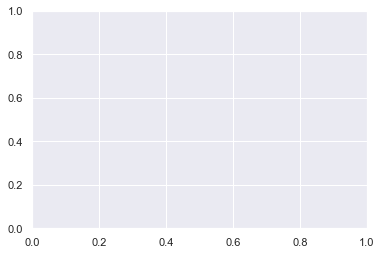

In [178]:
plt.scatter(X_all_pca.iloc[:, 0], X_all_pca.iloc[:, 1], c=y, cmap='autumn')
plt.show()

def plot_kmeans_n(n=2, data_set=X):
    kmeans = KMeans(n_clusters=n)
    
    # Predict the centers of the datasets using fit_predict
    y_pred = kmeans.fit_predict(data_set)
    
    # Plot
    plt.scatter(data_set.iloc[:, :], data_set.iloc[:, :], c=y_pred)
    plt.title(f'N={n}')
    plt.show()

# Try running this function for different values of n
plot_kmeans_n(3, X_all_pca)

In [183]:
kmeans2 = KMeans(n_clusters=2).fit(principalDf)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = principalDf.iloc[:, 0].min() - 1, principalDf.iloc[:, 0].max() + 1
y_min, y_max = principalDf.iloc[:, 1].min() - 1, principalDf.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(principalDf.iloc[:, 0], principalDf.iloc[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans2.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

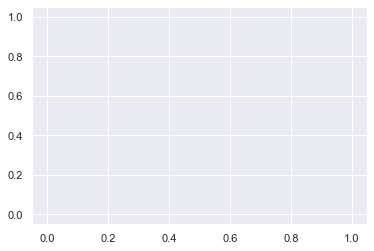

In [182]:
# Extract the projections of the first 2 components
pca2 = X_all_pca.iloc[:, :2]

# Plot the first 2 components
principalDf = pd.DataFrame(data = pca2, 
                           columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([y, principalDf], axis = 1)
finalDf.columns = ['labels', 'principal component 1', 'principal component 2']

ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue='labels', data=finalDf)
plt.show()